##Regression Lab 1: Linear Regression, MSE and Polynomial Regression

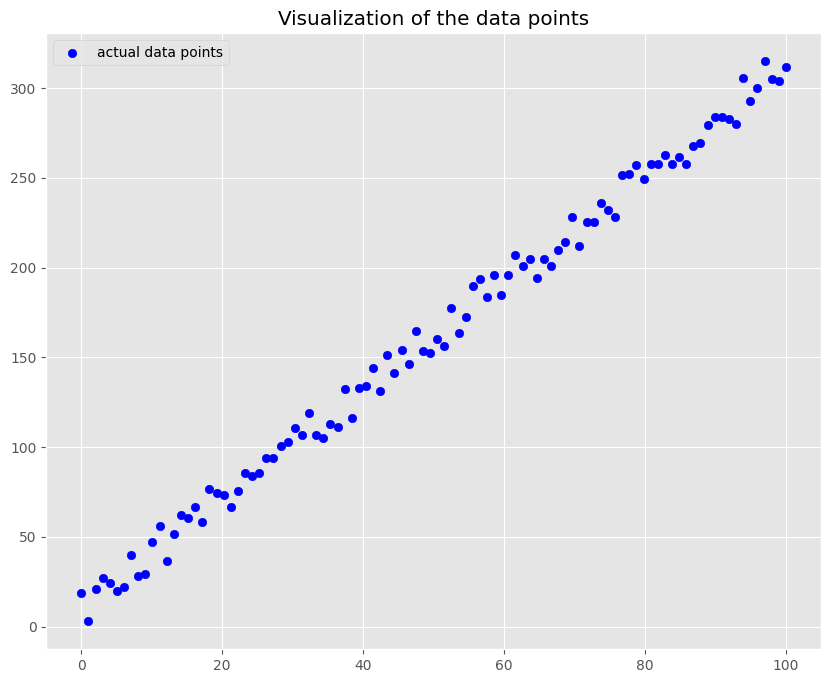

In [ ]:
import numpy as np
from sklearn import linear_model,metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8
np.random.seed(10)

x = np.linspace(0,100,100).reshape((-1,1))
y = (np.random.rand(100)*25).astype(int).reshape((-1,1)) + 3*x

plt.title("Visualization of the data points")
plt.scatter(x,y,color="blue")
plt.legend(["actual data points"])
plt.show()


In [ ]:
#Brute-force solution

In [ ]:
for m in range(-2,6):
  for c in range(-5,5):
    py = (m*x + c).reshape((-1,1))

    plt.plot(x,py,color="red")
    plt.scatter(x,y,color="blue")
    plt.show()

    print("Average distance: {}\n".format(np.mean(np.sqrt((y-py)**2))))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def lin_regression(x,y):

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  print("The coefficient is: {} and the intercept is: {}\n".format(m1.coef_[0][0],m1.intercept_[0]))

  y_pred = m1.predict(x_test)
  metrics.mean_squared_error(y_pred,y_test)


  plt.title("Visualization of actual data vs predicted outputs")
  plt.scatter(x,y,color="blue")
  plt.plot(x_test,y_pred,color="red")
  plt.legend(["predicted line","actual data points"])
  plt.show()

  print("The RMSE for linear regression is: {}".format(math.sqrt(metrics.mean_squared_error(y_pred,y_test))))
  lin_regression(x,y)

In [ ]:
lin_regression(x,y)

Output hidden; open in https://colab.research.google.com to view.

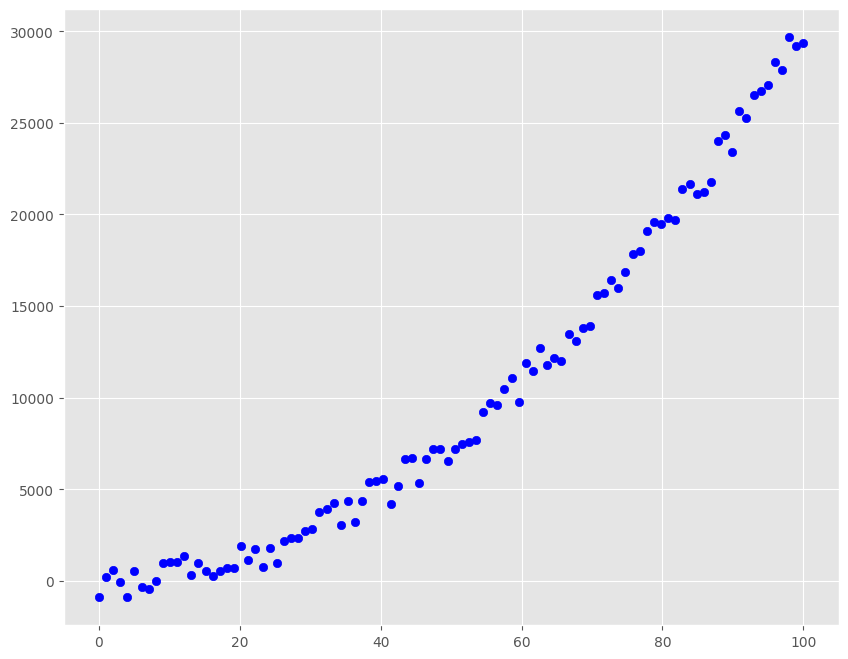

In [ ]:
# simple polynomial with noise

y2 = (np.random.randint(-1000,1000,x.shape)).astype(int).reshape((-1,1)) + 3*x**2
plt.scatter(x,y2,color="blue")
plt.show()

**POLYNOMIAL REGRESSION**

In [ ]:

def poly_regression(x,y,deg):

  x = x.reshape((-1,1))
  y = y.reshape((-1,1))

  poly = PolynomialFeatures(degree=deg)

  x_ = poly.fit_transform(x)
  poly.fit(x_,y)

  m1 = linear_model.LinearRegression()
  m1.fit(x_,y)
  y_pred = m1.predict(x_)

  mse = np.sqrt(metrics.mean_squared_error(y_pred,y))

  plt.plot(x,y_pred,color="red")
  plt.title("Visualization of actual data vs predicted outputs (polynomial regression)")
  plt.scatter(x,y,color="blue")
  plt.legend(["predicted polynomial","actual data points"])
  plt.show()

  print("The RMSE for polynomial regression is: {}".format(mse))
  lin_regression(x,y2)

poly_regression(x,y2,2)


Output hidden; open in https://colab.research.google.com to view.

Applying linear regression to housing data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
df['MEDV'] = df['median_house_value']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,MEDV
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,342200.0


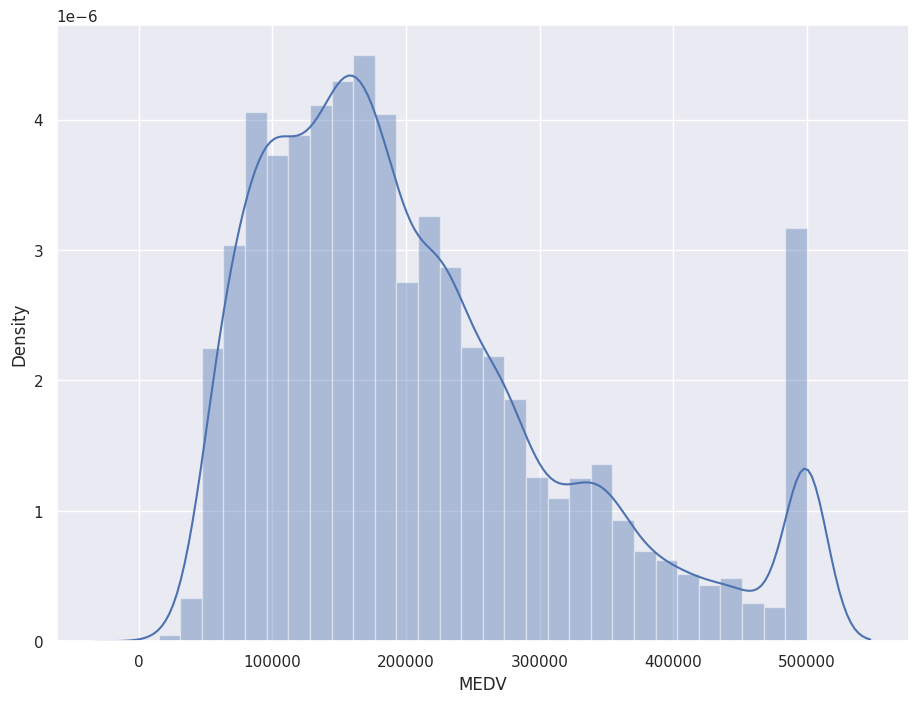

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

In [ ]:
df.drop(['ocean_proximity'],inplace=True,axis=1)

<Axes: >

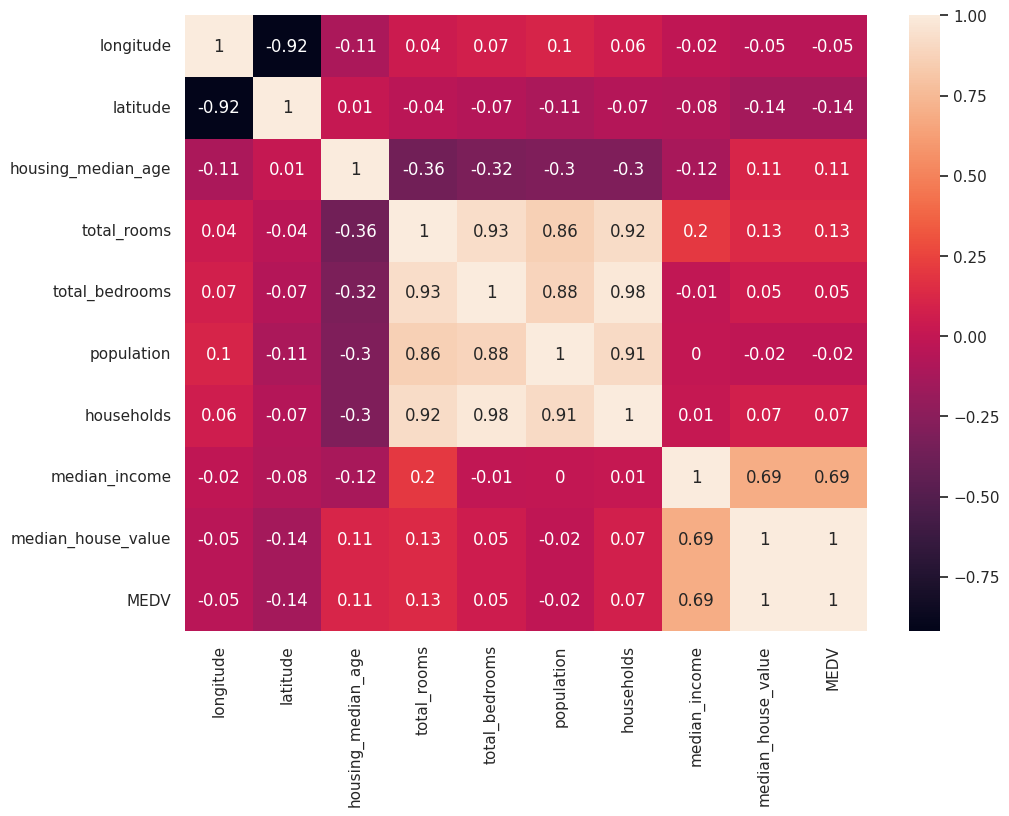

In [ ]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

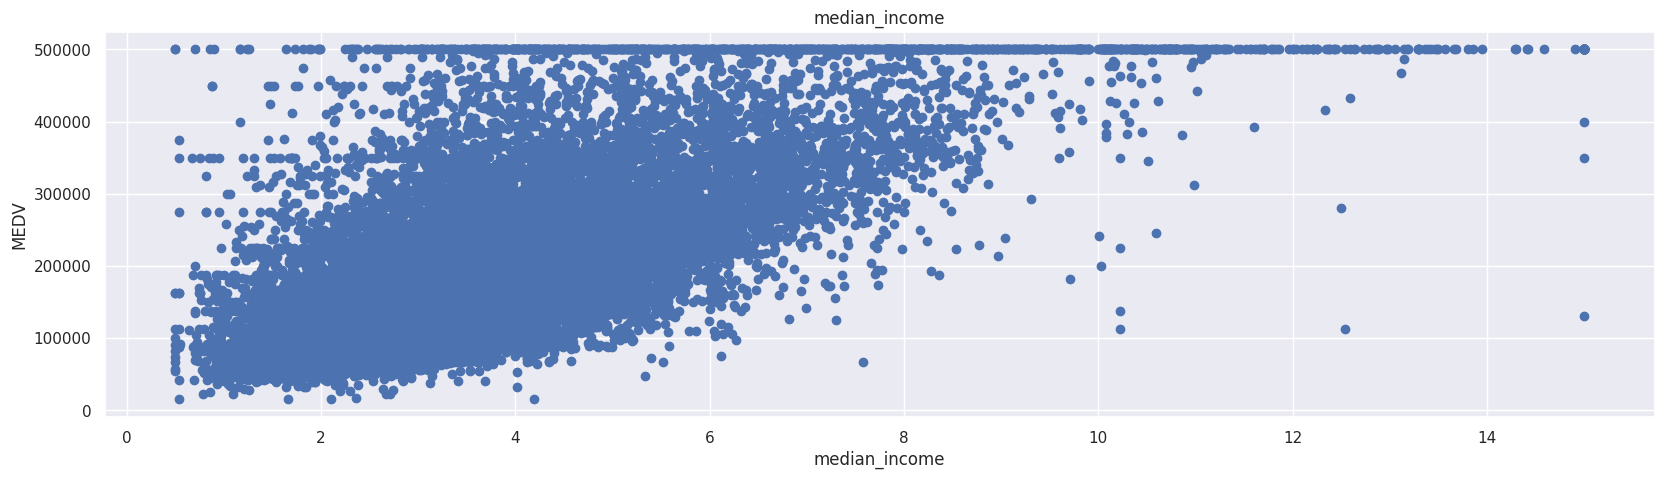

In [ ]:
plt.figure(figsize=(20, 5))

features = ['median_income']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
x_ex = pd.DataFrame(np.c_[df['median_income']], columns = ['median_income'])
y_ex = df['MEDV']

x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size = 0.2, random_state=42)

lin_model = linear_model.LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)

LinearRegression()

In [ ]:
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict)))
r2 = metrics.r2_score(y_ex_train, y_ex_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse))

y_ex_test_predict = lin_model.predict(x_ex_test)
rmse = (np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict)))
r2 = metrics.r2_score(y_ex_test, y_ex_test_predict)

print("Model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 83614.87409655548

Model performance for testing set
--------------------------------------
RMSE is 84209.01241414454


**Exercises**

1. Higher Degree Polynomials

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
The RMSE for polynomial regression is: 0.12952100984493725
The RMSE for linear regression is: 0.1291622765011029


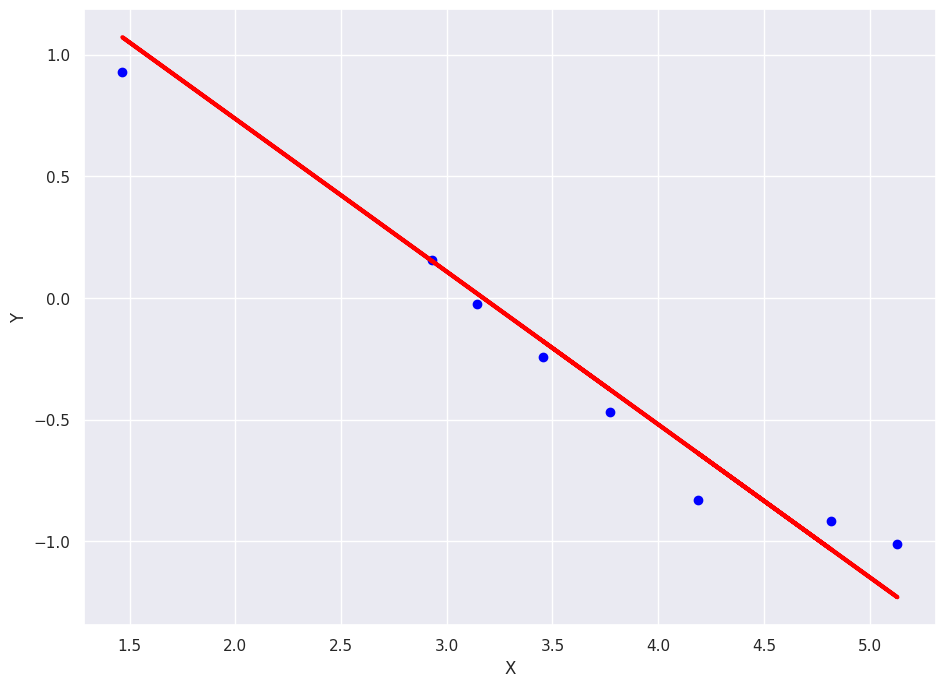

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn import metrics

def lin_regression(x, y):
  # Reshape x to a 2D array with a single column
  x = x.reshape(-1, 1)

  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

  m1 = linear_model.LinearRegression()
  m1.fit(x_train,y_train)

  y_pred = m1.predict(x_test)

  print("The RMSE for linear regression is: {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

  plt.scatter(x_test,y_test, color="blue")
  plt.plot(x_test,y_pred, color='red', linewidth=3)

  plt.xlabel("X")
  plt.ylabel("Y")

  plt.show()


def poly_regression(x, y, deg):
  # Reshape x to a 2D array with a single column
  x = x.reshape(-1, 1)

  poly_features = PolynomialFeatures(degree=deg)
  x_poly = poly_features.fit_transform(x)

  model = linear_model.LinearRegression()
  model.fit(x_poly,y)
  y2 = model.predict(x_poly)

  mse = np.sqrt(metrics.mean_squared_error(y,y2))

  print("The RMSE for polynomial regression is: {}".format(mse))

  # Ensure x and y2 have the same number of samples
  x = x.reshape(-1)
  y2 = y2.reshape(-1)

  lin_regression(x,y2)

np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,6)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.15,len(x_ex))
deg = 9 #@param {type:"slider", min: 2, max:15, step:1}
poly_regression(x_ex,y_ex,deg)

2. Try running the above with degree set to 1. You will observe that only higher degree polynomials are able to fit to such noisy data.

The RMSE for polynomial regression is: 0.21526437026076664
The RMSE for linear regression is: 0.0


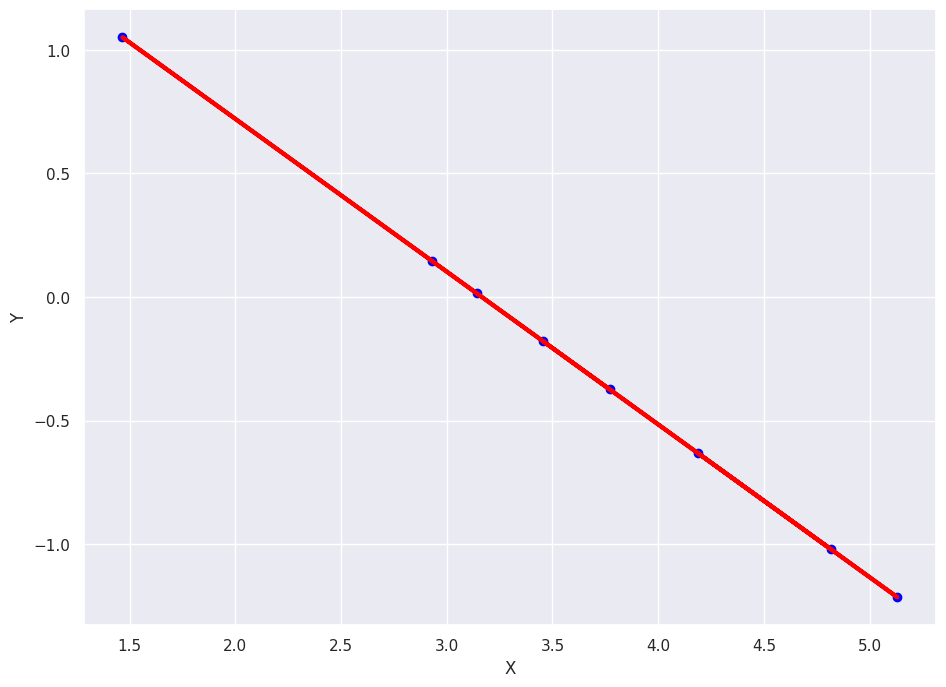

In [ ]:
deg = 1
np.random.seed(10)

x_ex = np.array([i*np.pi/180 for i in range(60,300,6)])
y_ex = np.sin(x_ex) + np.random.normal(0,0.15,len(x_ex))
poly_regression(x_ex,y_ex,deg)